# Poisson Model of Spike Generation

[David Heeger(2000), Poisson Model of Spike Generation](http://www.cns.nyu.edu/~david/handouts/poisson.pdf)

In [2]:
using Revise, NeuroAnalysis, Interact
rate = slider(0:100,value=50,label="Spike Rate")
duration = slider(0:5000,value=1000,label="Spike Train Duration")
refreshperiod = slider(1:5,value=2,label="Spike Refresh Period")
ntrain = slider(1:1000,value=100,label="Number of Spike Train")
vbox(rate,duration,refreshperiod,ntrain)

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { className="field" }
        (div { attributes=Dict("style"=>"display:flex; justify-content:center; align-items:center;") }
      (div { attributes=Dict("style"=>"text-align:right;width:18%") }
        (label { className="interact " style=Dict{Any,Any}(:padding=>"5px 10px 0px 10px") }
          "Spike Rate"))
      (div { attributes=Dict("style"=>"flex-grow:1; margin: 0 2%") }
        (input { max=100 min=0 attributes=Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal") step=1 className="slider slider is-fullwidth" style=Dict{Any,Any}() }))
      (div { attributes=Dict("style"=>"width:18%") }
        (p { attributes=Dict("data-bind"=>"text: value") }))))
  (div { className="field" }
        (div { attributes=Dict("style"=>"display:flex; justify-content:center; align-items:center;") }
      (div { attributes=Dict("style"=>"text-align:right;width:18%") }
        (label { className="interact " style=Dict{Any,Any}(:padding=>"5px 10px 0px 10px") }
          "Spike Train Duration"))
      (div { attributes=Dict("style"=>"flex-grow:1; margin: 0 2%") }
        (input { max=5000 min=0 attributes=Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal") step=1 className="slider slider is-fullwidth" style=Dict{Any,Any}() }))
      (div { attributes=Dict("style"=>"width:18%") }
        (p { attributes=Dict("data-bind"=>"text: value") }))))
  (div { className="field" }
        (div { attributes=Dict("style"=>"display:flex; justify-content:center; align-items:center;") }
      (div { attributes=Dict("style"=>"text-align:right;width:18%") }
        (label { className="interact " style=Dict{Any,Any}(:padding=>"5px 10px 0px 10px") }
          "Spike Refresh Period"))
      (div { attributes=Dict("style"=>"flex-grow:1; margin: 0 2%") }
        (input { max=5 min=1 attributes=Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal") step=1 className="slider slider is-fullwidth" style=Dict{Any,Any}() }))
      (div { attributes=Dict("style"=>"width:18%") }
        (p { attributes=Dict("data-bind"=>"text: value") }))))
  (div { className="field" }
        (div { attributes=Dict("style"=>"display:flex; justify-content:center; align-items:center;") }
      (div { attributes=Dict("style"=>"text-align:right;width:18%") }
        (label { className="interact " style=Dict{Any,Any}(:padding=>"5px 10px 0px 10px") }
          "Number of Spike Train"))
      (div { attributes=Dict("style"=>"flex-grow:1; margin: 0 2%") }
        (input { max=1000 min=1 attributes=Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal") step=1 className="slider slider is-fullwidth" style=Dict{Any,Any}() }))
      (div { attributes=Dict("style"=>"width:18%") }
        (p { attributes=Dict("data-bind"=>"text: value") })))))

## Homogeneous Poisson Process, where instantaneous ﬁring rate is constant

### Inter-Spike-Interval Exponential Distribution Method

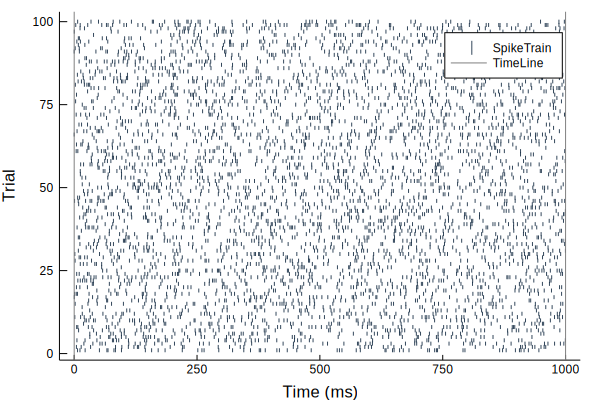

In [3]:
sts = [poissonspike(rate[],duration[],rp=refreshperiod[]) for _ in 1:ntrain[]]
plotspiketrain(sts,timeline=[0,duration[]])

### Instantaneous Firing Rate Method

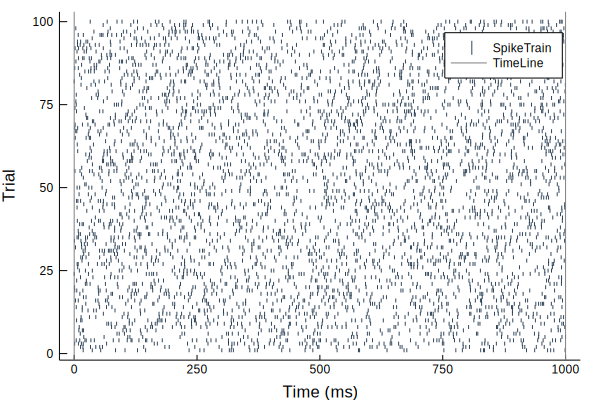

In [4]:
sts = [poissonspike(t->rate[],duration[],rp=refreshperiod[]) for _ in 1:ntrain[]]
plotspiketrain(sts,timeline=[0,duration[]])

## Inhomogeneous Poisson Process, where instantaneous ﬁring rate is changing

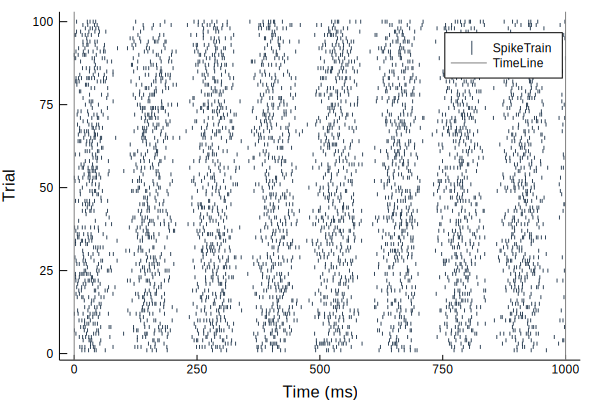

In [5]:
sts = [poissonspike(t->rate[]*(sin(0.05t)+1),duration[],rp=refreshperiod[]) for _ in 1:ntrain[]]
plotspiketrain(sts,timeline=[0,duration[]])